In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [97]:
vgsales=pd.read_csv('/content/sample_data/vgsales.csv')

In [98]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [99]:
vgsales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [100]:
# Fill missing 'Year' values with the mode

vgsales['Year']=vgsales['Year'].fillna(vgsales['Year'].mode()[0])


In [101]:
vgsales.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [102]:
#find the duplicates
vgsales.duplicated().sum()

np.int64(0)

In [103]:
# Fill missing 'Publisher' values with the mode
vgsales['Publisher']=vgsales['Publisher'].fillna(vgsales['Publisher'].mode()[0])

In [104]:
vgsales.isnull().sum().sum()

np.int64(0)

In [105]:
pip install category_encoders

In [106]:
vgsales.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [107]:
#Apply one hot encoding for categorical columns
import category_encoders as ce

encoder=ce.OneHotEncoder(cols=['Genre','Platform'],handle_unknown='return-nan',return_df=True,use_cat_names=True)

In [108]:

encoded_vgsales=encoder.fit_transform(vgsales[['Genre','Platform']])

In [109]:
final_encoded_vgsales =  pd.concat([ vgsales, encoded_vgsales], axis=1)

In [110]:
final_encoded_vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                16598 non-null  int64  
 1   Name                16598 non-null  object 
 2   Platform            16598 non-null  object 
 3   Year                16598 non-null  float64
 4   Genre               16598 non-null  object 
 5   Publisher           16598 non-null  object 
 6   NA_Sales            16598 non-null  float64
 7   EU_Sales            16598 non-null  float64
 8   JP_Sales            16598 non-null  float64
 9   Other_Sales         16598 non-null  float64
 10  Global_Sales        16598 non-null  float64
 11  Genre_Sports        16598 non-null  int64  
 12  Genre_Platform      16598 non-null  int64  
 13  Genre_Racing        16598 non-null  int64  
 14  Genre_Role-Playing  16598 non-null  int64  
 15  Genre_Puzzle        16598 non-null  int64  
 16  Genr

In [111]:
final_encoded_vgsales

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  ...  Platform_DC  Platform_PSV  Platform_SAT  \
0             8.46  ...            0             0             0   
1             0.77  ...            0             0             0   
2             3.31  ...            0             0             0   
3             2.96  ...            0             0             0   
4             1.00  ...            0             0             0   
...            ...  ...          ...           ...           ...   
16593         0.00  ...            0             0             0   
16594         0.00  ...            0             0             0   
16595         0.00  ...            0             0             0   
16596         0.00  ...            0             0             0   
16597         0.00  ...            0             0             0   

       Platform_SCD  Platform_WS  Platform_NG  Platform_TG16  Platform_3DO  \
0                 0            0            0              0             0   
1                 0            0            0              0             0   
2                 0            0            0              0             0   
3                 0            0            0              0             0   
4                 0            0            0              0             0   
...             ...          ...          ...            ...           ...   
16593             0            0            0              0             0   
16594             0            0            0              0             0   
16595             0            0            0              0             0   
16596             0            0            0              0             0   
16597             0            0            0              0             0   

       Platform_GG  Platform_PCFX  
0                0              0  
1                0              0  
2                0              0  
3                0              0  
4                0              0  
...            ...            ...  
16593            0              0  
16594            0              0  
16595            0              0  
16596            0              0  
16597            0              0  

[16598 rows x 54 columns]

In [112]:
final_encoded_vgsales.duplicated().sum()

np.int64(0)

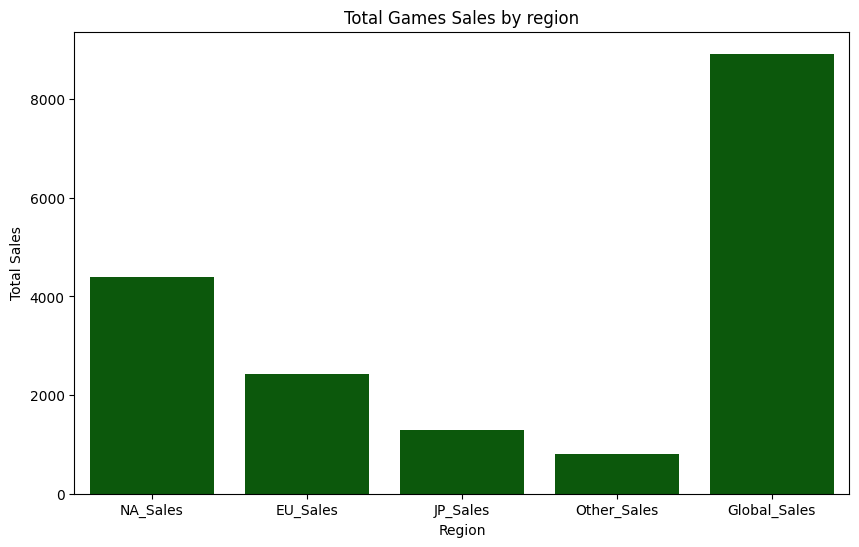

In [113]:
#10.Which region generates the most game sales?
regional_sales=final_encoded_vgsales[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()
plt.figure(figsize=(10,6))
sns.barplot(x=regional_sales.index,y=regional_sales.values,color='DarkGreen')
plt.title('Total Games Sales by region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

In [114]:
#11.🕹️ What are the best-selling platforms?

platform_sales = final_encoded_vgsales.groupby('Platform')['Global_Sales'].sum().reset_index()
platform_sales = platform_sales.sort_values(by='Global_Sales', ascending=False)

fig = px.bar(platform_sales,
               x='Platform',
               y='Global_Sales',
               title='Best Selling Platforms')
fig.show()

In [115]:
#12. What’s the trend of game releases and sales over years?
# Trend of game releases over the years using final_encoded_vgsales
releases_per_year = final_encoded_vgsales.groupby('Year').size().reset_index(name='Number of Releases')

# Trend of game sales over the years using final_encoded_vgsales
sales_per_year = final_encoded_vgsales.groupby('Year')['Global_Sales'].sum().reset_index()

merged_trends = pd.merge(releases_per_year, sales_per_year, on='Year')
merged_trends.columns=['Year','Number of Releases','Global_Sales']
fig = px.line(merged_trends, x='Year', y=['Number of Releases','Global_Sales'], title='Game Release Trend Over Years')
# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="Number of Releases", secondary_y=False)
fig.update_yaxes(title_text="Total Sales (Millions)", secondary_y=True)
fig.show()

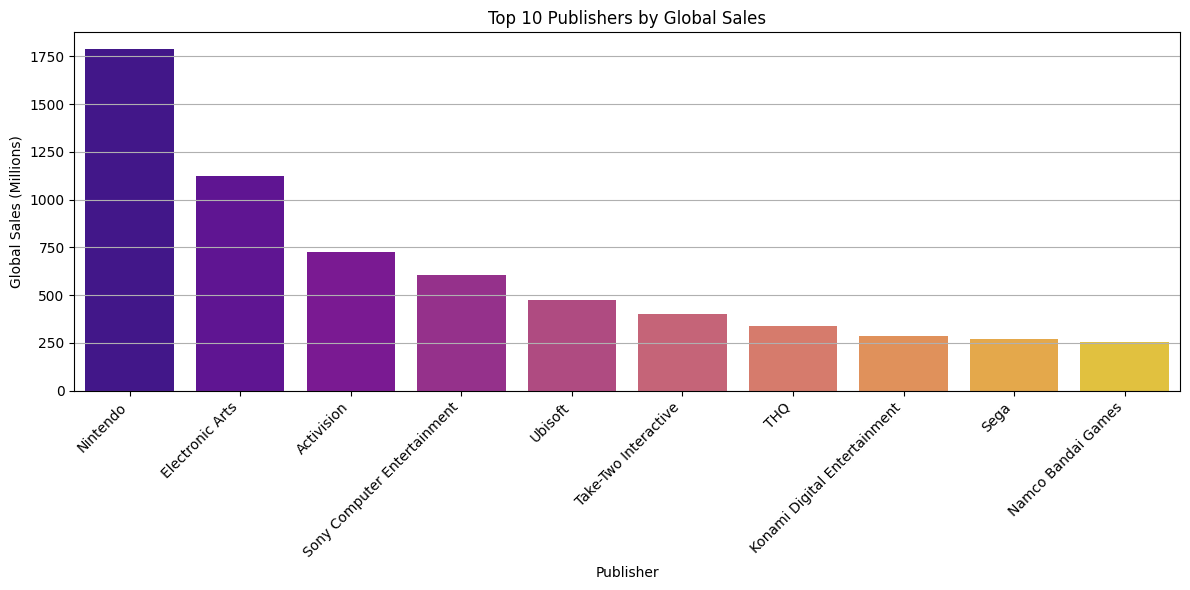

In [116]:
#13.Who are the top publishers by sales?
# Group by Publisher and sum Global_Sales, then sort
top_publishers = final_encoded_vgsales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

# Select the top 10 publishers
top_10_publishers = top_publishers.head(10).reset_index()


plt.figure(figsize=(12, 6))
#top_10_publishers.plot(kind='bar', color='Violet', edgecolor='black')
sns.barplot(x='Publisher', y='Global_Sales', hue='Publisher', data=top_10_publishers, palette='plasma', legend=False)
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (Millions)')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [117]:
#14. Which games are the top 10 best-sellers globally?
Topgames=final_encoded_vgsales[['Name','Global_Sales']].sort_values(by='Global_Sales',ascending=False).head(10)
plt.figure(figsize=(12, 6))

sns.barplot(x='Name', y='Global_Sales', hue='Name', data=Topgames, palette='cividis', legend=False)

plt.title('Top 10 Best-sellers Globally')
plt.xlabel('Game Name')
plt.ylabel('Global Sales')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [118]:
#15.How do regional sales compare for specific platforms?
regional_sales_by_platform = final_encoded_vgsales.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

fig = px.bar(regional_sales_by_platform,
             x='Platform',
             y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
             title='Regional Sales Comparison by Platform')
fig.update_layout(barmode='stack')
fig.show()

In [119]:
#16.How has the market evolved by platform over time?
platform_evolution = final_encoded_vgsales.groupby(['Year', 'Platform']).size().reset_index(name='Count')

fig = px.line(platform_evolution,
              x='Year',
              y='Count',
              color='Platform',
              title='Market Evolution by Platform Over Time')
fig.show()

In [120]:
#17. What are the regional genre preferences?
regional_genre_preference = final_encoded_vgsales.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
fig = px.bar(regional_genre_preference,
             x='Genre',
             y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
             title='Regional Genre preferences')
fig.update_layout(barmode='stack')
fig.show()

In [121]:
#18.What’s the yearly sales change per region?
regional_yearly_sales = final_encoded_vgsales.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

fig = px.line(regional_yearly_sales,
              x='Year',
              y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
              title='Yearly Sales Change per Region')
fig.update_layout(legend_title_text='Region')
fig.show()

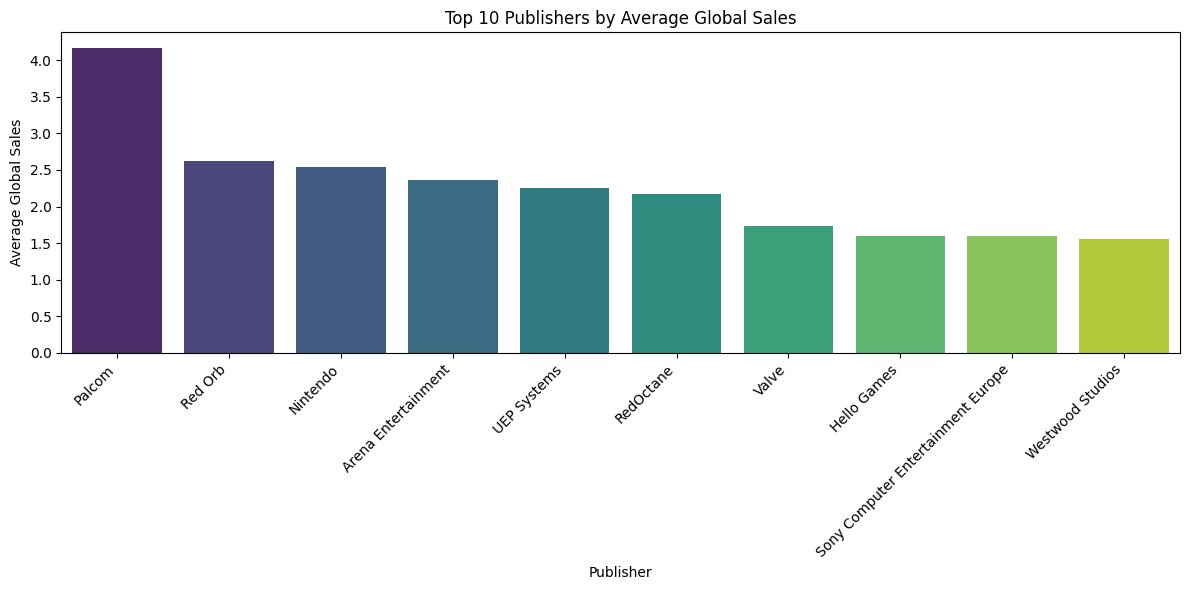

In [122]:
#19.What is the average sales per publisher?

average_sales=final_encoded_vgsales.groupby('Publisher')['Global_Sales'].mean().reset_index()
average_sales=average_sales.sort_values(by='Global_Sales',ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='Publisher',y='Global_Sales',hue='Publisher',data=average_sales.head(10),palette='viridis',legend=False)
plt.title('Top 10 Publishers by Average Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Average Global Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [123]:
# Plotting the top 5 best-selling games for a specific platform (e.g., PS2)

# Filter the DataFrame for the chosen platform
ps2_games = final_encoded_vgsales[final_encoded_vgsales['Platform'] == 'PS2']

# Get the top 5 best-selling games for this platform
top_5_ps2_games = ps2_games.sort_values(by='Global_Sales', ascending=False).head(5)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Global_Sales', data=top_5_ps2_games, palette='inferno')
plt.title('Top 5 Best-Selling Games on PS2')
plt.xlabel('Game Name')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()